In [12]:
import matplotlib
import matplotlib.font_manager as fm

matplotlib.use('Agg')
#matplotlib.rc('font', family="D2Coding")
# [f.fname for f in matplotlib.font_manager.fontManager.ttflist]
font_location = 'C:\\Users\\62190\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf' # ex - 또는 ./utils/NanumBarunGothic.ttf
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = font_name)

from patsy import *
# 경고 무시
import warnings
warnings.simplefilter('ignore')

# 자주 사용하는 패키지를 임포트
import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import sklearn as sk
import pgmpy
import scipy.stats

# matplotlib 설정
mpl.use('Agg')

# seaborn 설정
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

%matplotlib inline

## 확률론적 언어 모형

$$\begin{eqnarray}
P(w_1, w_2, \ldots, w_m) &=& P(w_1, w_2, \ldots, w_{m-1}) \cdot P(w_m\;|\; w_1, w_2, \ldots, w_{m-1}) \\
&=& P(w_1, w_2, \ldots, w_{m-2}) \cdot P(w_{m-1}\;|\; w_1, w_2, \ldots, w_{m-2}) \cdot P(w_m\;|\; w_1, w_2, \ldots, w_{m-1}) \\
&=& P(w_1) \cdot P(w_2 \;|\; w_1) \cdot  P(w_3 \;|\; w_1, w_2) P(w_4 \;|\; w_1, w_2, w_3) \cdots P(w_m\;|\; w_1, w_2, \ldots, w_{m-1})
\end{eqnarray}$$

## 바이그램 모형

$$P(w_1, w_2, \ldots, w_m) = P(w_1) \prod_{i=2}^{m} P(w_{i}\;|\; w_{i-1})$$

### NLTK의 N그램 기능

In [1]:
from nltk import bigrams, word_tokenize
from nltk.util import ngrams

sentence = "I am a boy."
tokens = word_tokenize(sentence)

bigram = bigrams(tokens)
trigram = ngrams(tokens, 3)

print("\nbigram:")
for t in bigram:
    print(t)

print("\ntrigram:")
for t in trigram:
    print(t)


bigram:
('I', 'am')
('am', 'a')
('a', 'boy')
('boy', '.')

trigram:
('I', 'am', 'a')
('am', 'a', 'boy')
('a', 'boy', '.')


In [2]:
bigram = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE")
for t in bigram:
    print(t)

('SS', 'I')
('I', 'am')
('am', 'a')
('a', 'boy')
('boy', '.')
('.', 'SE')


## 조건부 확률 추정 방법

In [3]:
from nltk import ConditionalFreqDist

sentence = "I am a boy."
tokens = word_tokenize(sentence)
bigram = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE")
cfd = ConditionalFreqDist([(t[0], t[1]) for t in bigram])

In [4]:
cfd.conditions()

['SS', 'I', 'am', 'a', 'boy', '.']

In [5]:
cfd["SS"]

FreqDist({'I': 1})

In [6]:
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')
from nltk.corpus import movie_reviews

sentences = []
for tokens in movie_reviews.sents():
    bigram = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE")
    sentences += [t for t in bigram]

sentences[:20]

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\62190\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\62190\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('SS', 'plot'),
 ('plot', ':'),
 (':', 'two'),
 ('two', 'teen'),
 ('teen', 'couples'),
 ('couples', 'go'),
 ('go', 'to'),
 ('to', 'a'),
 ('a', 'church'),
 ('church', 'party'),
 ('party', ','),
 (',', 'drink'),
 ('drink', 'and'),
 ('and', 'then'),
 ('then', 'drive'),
 ('drive', '.'),
 ('.', 'SE'),
 ('SS', 'they'),
 ('they', 'get'),
 ('get', 'into')]

In [8]:
cfd = ConditionalFreqDist(sentences)

cfd["SS"].most_common(5)

[('the', 8071), ('.', 3173), ('it', 3136), ('i', 2471), ('but', 1814)]

In [9]:
cfd["i"].most_common(5)

[("'", 1357), ('was', 506), ('can', 351), ('have', 330), ('don', 276)]

In [10]:
cfd["."].most_common(5)

[('SE', 63404), ('"', 1854), (')', 535), ("'", 70), (']', 10)]

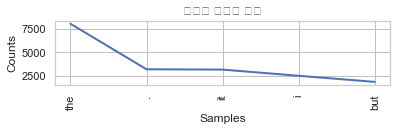

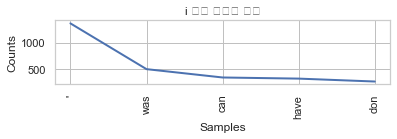

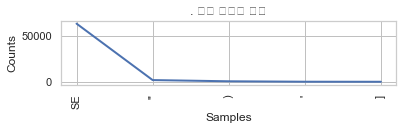

In [13]:
plt.subplot(311)
cfd["SS"].plot(5, title="문장의 첫단어 분포")
plt.subplot(312)
cfd["i"].plot(5, title="i 다음 단어의 분포")
plt.subplot(313)
cfd["."].plot(5, title=". 다음 단어의 분포")

In [15]:
from nltk.probability import ConditionalProbDist, MLEProbDist
cpd = ConditionalProbDist(cfd, MLEProbDist)

In [16]:
cpd["i"].prob("am")

0.018562267971650354

In [17]:
cpd["i"].prob("is")

0.0002249971875351558

In [18]:
cpd["we"].prob("are")

0.08504504504504505

In [19]:
cpd["we"].prob("is")

0.0

## 바이그램 언어 모형

$$P(\text{SS I am a boy SE}) = P(\text{I}\;|\; \text{SS}) \cdot P(\text{am}\;|\; \text{I}) \cdot P(\text{a}\;|\; \text{am}) \cdot P(\text{boy}\;|\; \text{a}) \cdot P(.\;|\; \text{boy}) \cdot P(\text{SE}\;|\; .)$$

In [22]:
def sentence_score(s):
    p = 0.0
    for i in range(len(s) - 1):
        c = s[i]
        w = s[i + 1]
        p += np.log(cpd[c].prob(w) + np.finfo(float).eps)
    return np.exp(p)

test_sentence = ["i", "like", "the", "movie", "."]
sentence_score(test_sentence)

2.740764134071561e-06

In [23]:
test_sentence = ["like", "i", "the", ".", "movie"]
sentence_score(test_sentence)

1.5015040140827832e-38

### 문장의 생성

In [24]:
def generate_sentence(seed=None):
    if seed is not None:
        import random
        random.seed(seed)
    c = "SS"
    sentence = []
    while True:
        if c not in cpd:
            break
        w = cpd[c].generate()

        if w == "SE":
            break
        elif w in ["i", "ii", "iii"]:
            w2 = w.upper()
        elif w in ["mr", "luc", "i", "robin", "williams", "cindy", "crawford"]:
            w2 = w.title()
        else:
            w2 = w

        if c == "SS":
            sentence.append(w2.title())
        elif c in ["`", "\"", "'", "("]:
            sentence.append(w2)
        elif w in ["'", ".", ",", ")", ":", ";", "?"]:
            sentence.append(w2)
        else:
            sentence.append(" " + w2)

        c = w
    return "".join(sentence)

In [25]:
generate_sentence(6)

"Writers in one of the prison, yet, works as agent ray liotta, one of watching, we supposed to doubt that the holocaust - or the fact, the amc and don's wonderful experience, do what could either."

In [26]:
%%time
!wget -nc -q https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt

Wall time: 626 ms


In [28]:
import codecs
with codecs.open("ratings_train.txt", encoding='utf-8') as f:
    data = [line.split('\t') for line in f.read().splitlines()]
    data = data[1:]   # header 제외

docs = [row[1] for row in data]
len(docs)

150000

In [30]:
import warnings
warnings.simplefilter("ignore")

from konlpy.tag import Okt

tagger = Okt()

def tokenize(doc):
    tokens = ['/'.join(t) for t in tagger.pos(doc)]
    return tokens

tokenize("그 영화는 아주 재미있었어요.")

NameError: name '_jinit' is not defined

In [31]:
from tqdm import tqdm
sentences = []
for d in tqdm(docs):
    tokens = tokenize(d)
    bigram = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE")
    sentences += [t for t in bigram]

  0%|          | 0/150000 [00:00<?, ?it/s]


NameError: name 'tokenize' is not defined